# Описание заданий

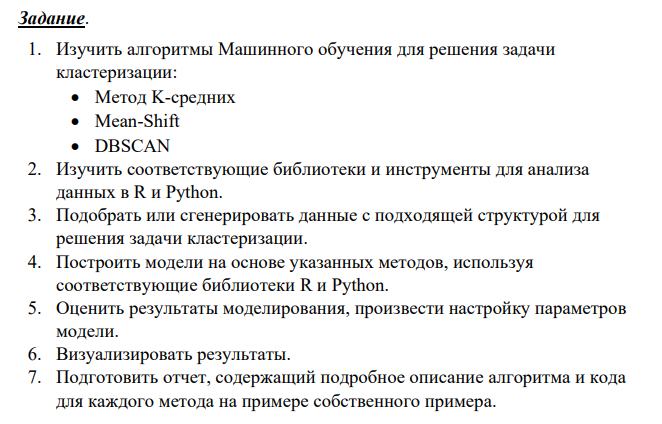

# Библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_samples

from warnings import filterwarnings
filterwarnings('ignore')

sns.set_style('whitegrid')

# Задание 1 и задание 2 расписываю в отчёте

# Задание 3: cгенерируем несколько наборов данных, чтобы показать различия алгоритмов в дальнейшем

In [2]:
X, y = make_blobs(n_samples=200, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=42)

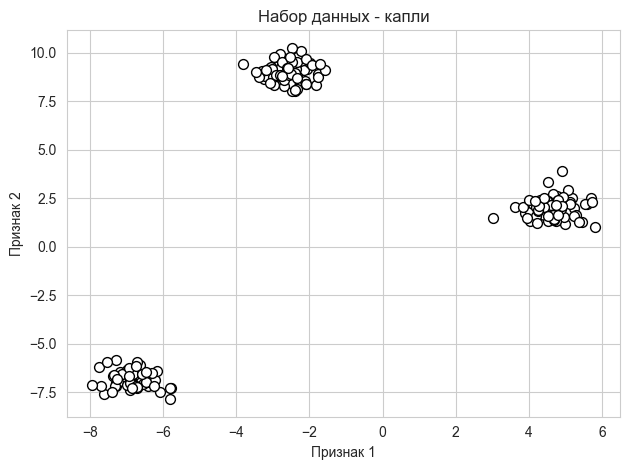

In [3]:
plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Набор данных - капли')
plt.tight_layout()

In [4]:
X1, y1 = make_moons(n_samples=200, noise=0.02, random_state=42)

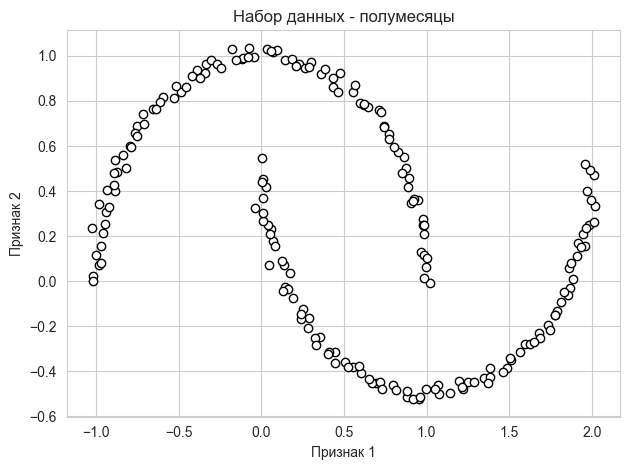

In [5]:
plt.scatter(X1[:, 0], X1[:, 1], c='white', edgecolor='black')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Набор данных - полумесяцы')
plt.tight_layout()

# Задание 4: построение алгоритмов без учителя

## Kmeans

In [6]:
kmeans_base_blobs = KMeans()
preds = kmeans_base_blobs.fit_predict(X)

In [7]:
print('Значения центроид, всего их 8 штук - 8 кластеров')
kmeans_base_blobs.cluster_centers_

Значения центроид, всего их 8 штук - 8 кластеров


array([[-7.16378735, -6.6780674 ],
       [-2.32968499,  8.43551078],
       [ 4.91897367,  2.42280245],
       [-2.91911795,  8.98574091],
       [ 4.09293483,  1.96405054],
       [-6.50137958, -7.0320331 ],
       [-2.2939489 ,  9.56723269],
       [ 4.92175398,  1.40382748]])

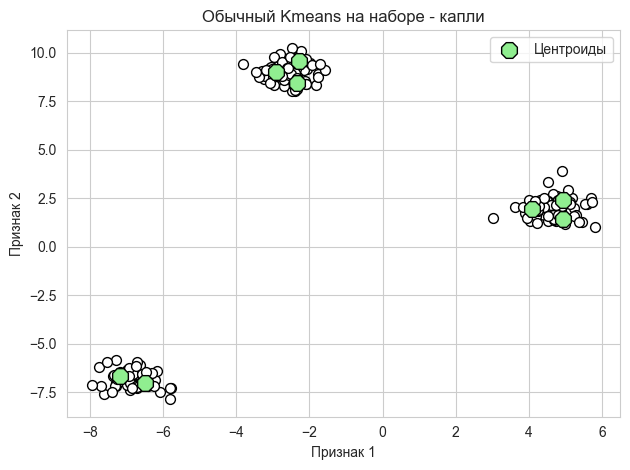

In [8]:
plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.scatter(kmeans_base_blobs.cluster_centers_[:, 0],
            kmeans_base_blobs.cluster_centers_[:, 1],
            s=150, marker='8',
            c='lightgreen', edgecolor='black',
            label='Центроиды')

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

plt.legend(scatterpoints=1)
plt.title('Обычный Kmeans на наборе - капли')
plt.tight_layout()

In [9]:
kmeans_base_moons = KMeans()
preds = kmeans_base_moons.fit_predict(X1)

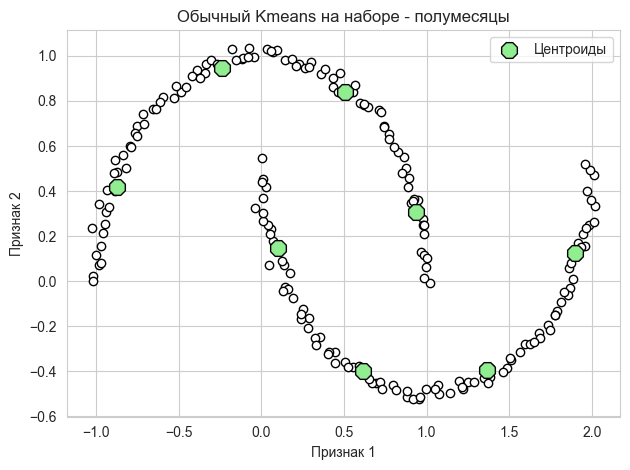

In [10]:
plt.scatter(X1[:, 0], X1[:, 1], c='white', edgecolor='black')
plt.scatter(kmeans_base_moons.cluster_centers_[:, 0],
            kmeans_base_moons.cluster_centers_[:, 1],
            s=150, marker='8',
            c='lightgreen', edgecolor='black',
            label='Центроиды')

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

plt.legend(scatterpoints=1)
plt.title('Обычный Kmeans на наборе - полумесяцы')
plt.tight_layout()

## DBSCAN

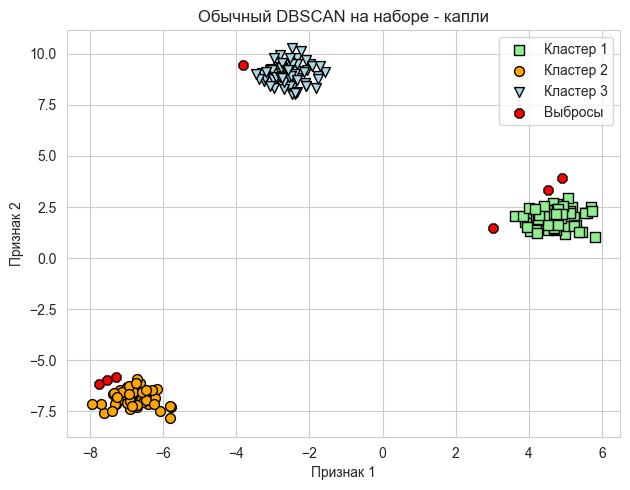

In [11]:
dbscan_base_blobs = DBSCAN()
preds_db = dbscan_base_blobs.fit_predict(X)
plt.scatter(X[preds_db == 0, 0],
            X[preds_db == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Кластер 1')
plt.scatter(X[preds_db == 1, 0],
            X[preds_db == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Кластер 2')
plt.scatter(X[preds_db == 2, 0],
            X[preds_db == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Кластер 3')
plt.scatter(X[preds_db == -1, 0],
            X[preds_db == -1, 1],
            s=50, c='red',
            marker='8', edgecolor='black',
            label='Выбросы')

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.tight_layout()
plt.title('Обычный DBSCAN на наборе - капли');

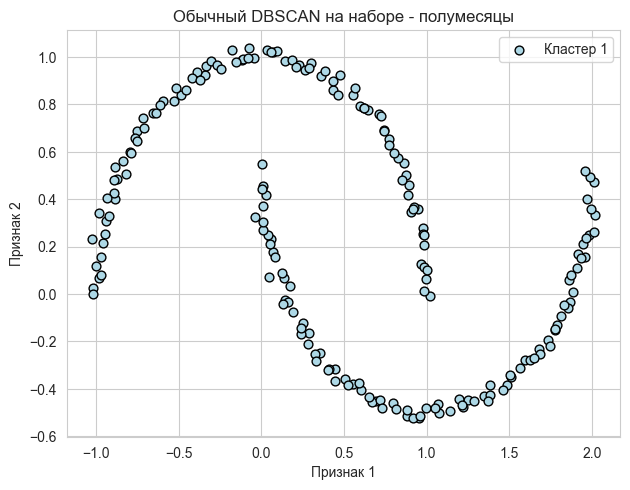

In [12]:
dbscan_base_moons = DBSCAN()
preds_db = dbscan_base_moons.fit_predict(X1)
plt.scatter(X1[preds_db == 0, 0], X1[preds_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='Кластер 1')

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.tight_layout()
plt.title('Обычный DBSCAN на наборе - полумесяцы');

## Mean-Shift

In [13]:
ms_base_blob = MeanShift()
preds_ms = ms_base_blob.fit_predict(X)

In [14]:
print('Получилось 3 кластера:')
ms_base_blob.cluster_centers_

Получилось 3 кластера:


array([[-2.58400946,  8.98592717],
       [-6.82788588, -6.85053991],
       [ 4.63906549,  2.03268433]])

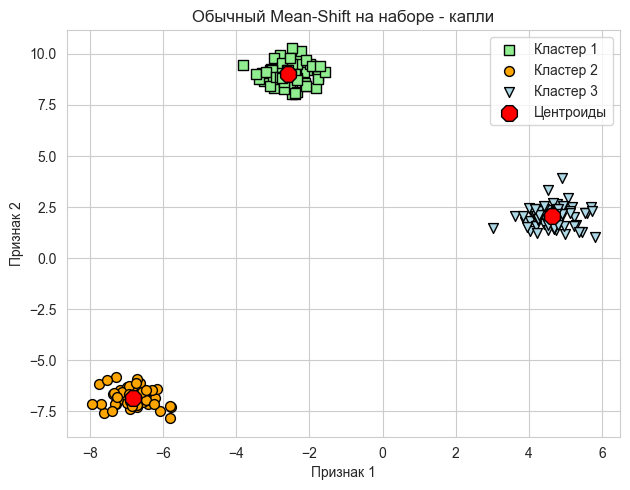

In [15]:
plt.scatter(X[preds_ms == 0, 0],
            X[preds_ms == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Кластер 1')
plt.scatter(X[preds_ms == 1, 0],
            X[preds_ms == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Кластер 2')
plt.scatter(X[preds_ms == 2, 0],
            X[preds_ms == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Кластер 3')
plt.scatter(ms_base_blob.cluster_centers_[:, 0],
            ms_base_blob.cluster_centers_[:, 1],
            s=150, marker='8',
            c='red', edgecolor='black',
            label='Центроиды')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.tight_layout()
plt.title('Обычный Mean-Shift на наборе - капли');

In [16]:
ms_base_moons = MeanShift()
preds_ms = ms_base_moons.fit_predict(X1)

In [17]:
print('Получилось 2 кластера:')
ms_base_moons.cluster_centers_

Получилось 2 кластера:


array([[ 0.60008269,  0.0868547 ],
       [-0.14082066,  0.66470827]])

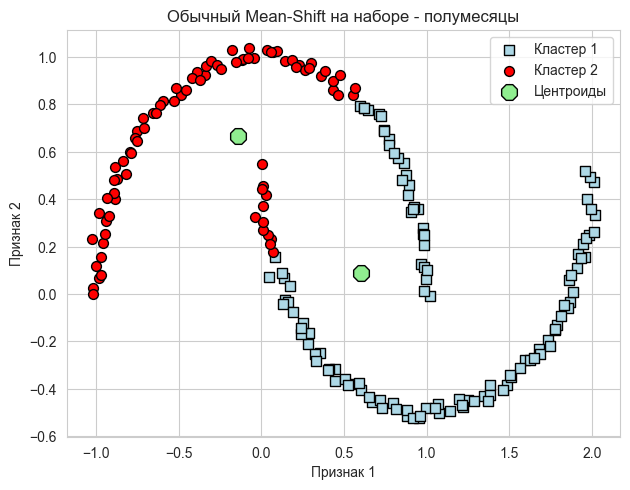

In [18]:
plt.scatter(X1[preds_ms == 0, 0],
            X1[preds_ms == 0, 1],
            s=50, c='lightblue',
            marker='s', edgecolor='black',
            label='Кластер 1')
plt.scatter(X1[preds_ms == 1, 0],
            X1[preds_ms == 1, 1],
            s=50, c='red',
            marker='o', edgecolor='black',
            label='Кластер 2')
plt.scatter(ms_base_moons.cluster_centers_[:, 0],
            ms_base_moons.cluster_centers_[:, 1],
            s=150, marker='8',
            c='lightgreen', edgecolor='black',
            label='Центроиды')

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.tight_layout()
plt.title('Обычный Mean-Shift на наборе - полумесяцы');

# Задание 5: оценка результатов и настройка гиперпараметров

**По визуализации можно сделать определённые выводы:**

    Простой Kmeans плохо справляется как с плотными данными, так и с обычными

    Простой DBSCAN справляется с разреженными данными, но не справляется с плотными

    Простой Mean-Shift тоже самое, что и DBSCAN

## Настройка Kmeans

In [19]:
distortions_blobs, distortions_moons = [], []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=42)
    km.fit(X)
    distortions_blobs.append(km.inertia_)

    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=42)
    km.fit(X1)
    distortions_moons.append(km.inertia_)

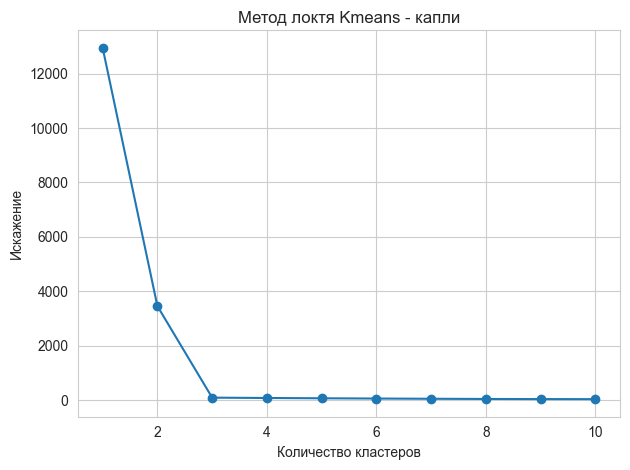

In [20]:
plt.plot(range(1, 11), distortions_blobs, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Искажение')
plt.title('Метод локтя Kmeans - капли')
plt.tight_layout()

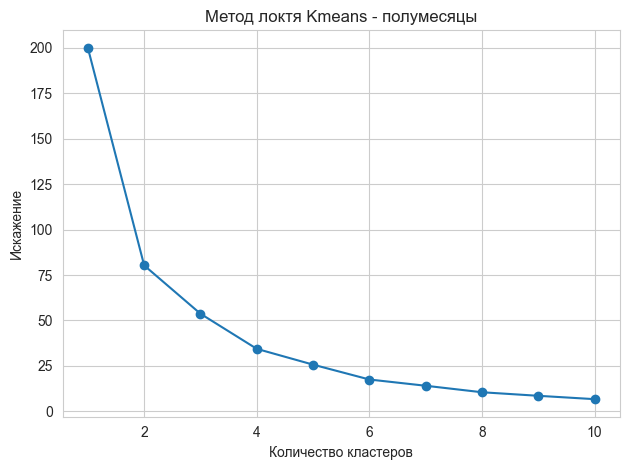

In [21]:
plt.plot(range(1, 11), distortions_moons, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Искажение')
plt.title('Метод локтя Kmeans - полумесяцы')
plt.tight_layout()

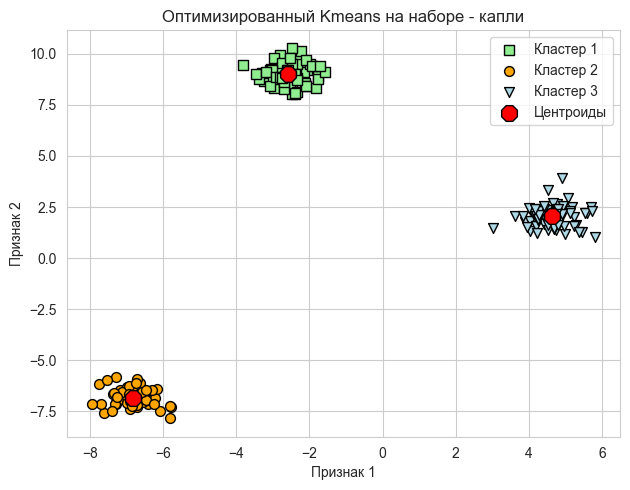

In [22]:
kmeans_blobs = KMeans(n_clusters=3, random_state=42)
preds = kmeans_blobs.fit_predict(X)

plt.scatter(X[preds == 0, 0],
            X[preds == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Кластер 1')
plt.scatter(X[preds == 1, 0],
            X[preds == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Кластер 2')
plt.scatter(X[preds == 2, 0],
            X[preds == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Кластер 3')
plt.scatter(kmeans_blobs.cluster_centers_[:, 0],
            kmeans_blobs.cluster_centers_[:, 1],
            s=150, marker='8',
            c='red', edgecolor='black',
            label='Центроиды')

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.tight_layout()
plt.title('Оптимизированный Kmeans на наборе - капли');

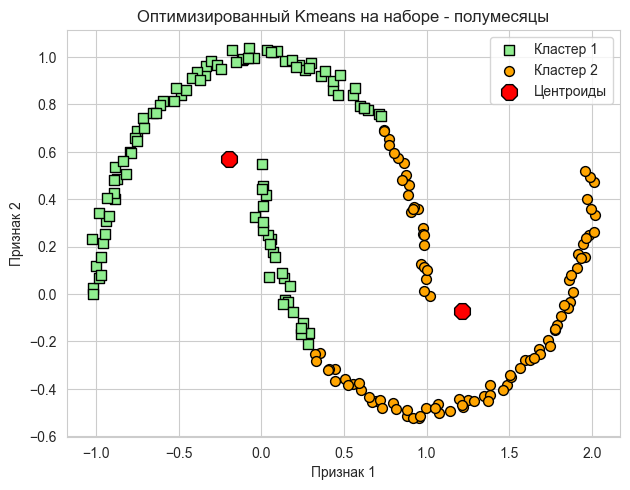

In [23]:
kmeans_moons = KMeans(n_clusters=2, random_state=42)
preds = kmeans_moons.fit_predict(X1)

plt.scatter(X1[preds == 0, 0],
            X1[preds == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Кластер 1')
plt.scatter(X1[preds == 1, 0],
            X1[preds == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Кластер 2')
plt.scatter(kmeans_moons.cluster_centers_[:, 0],
            kmeans_moons.cluster_centers_[:, 1],
            s=150, marker='8',
            c='red', edgecolor='black',
            label='Центроиды')

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.tight_layout()
plt.title('Оптимизированный Kmeans на наборе - полумесяцы');

## Настройка DBSCAN на полумесяцах с помощью силуэтных графиков

In [6]:
def print_siluette(model, name, param, name_param):
    cluster_labels = np.unique(preds)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, preds, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[preds == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = plt.cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
                 edgecolor='none', color=color)
    
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
        
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 
    
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Кластер')
    plt.xlabel('Коэффициент Силуэта')
    plt.title(f'{name} при {name_param}={param}')
    
    plt.tight_layout()

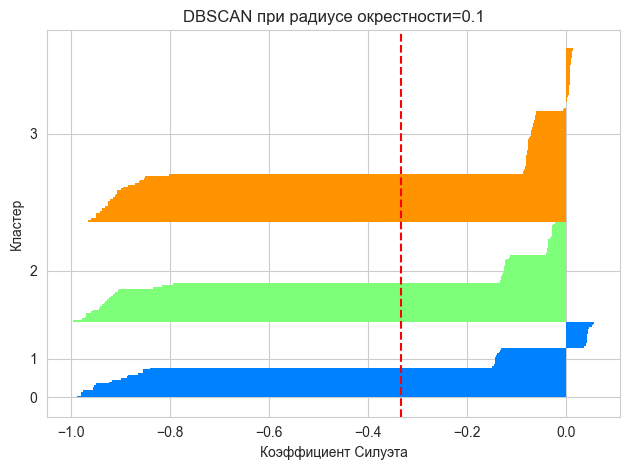

In [7]:
db = DBSCAN(eps=0.1)
preds = db.fit_predict(X1)
print_siluette(db, 'DBSCAN', 0.1, 'радиусе окрестности')

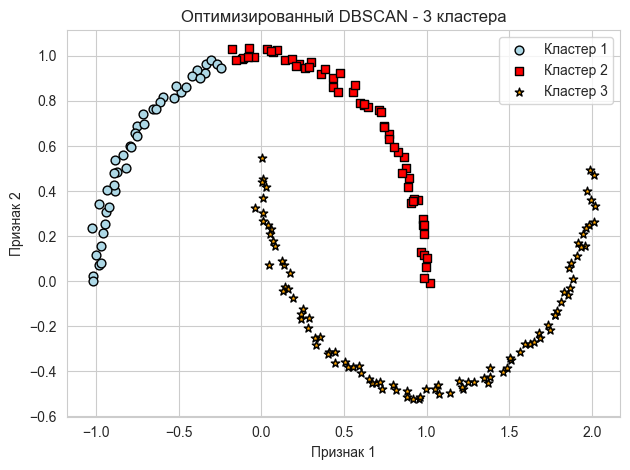

In [8]:
plt.scatter(X1[preds == 0, 0], X1[preds == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='Кластер 1')
plt.scatter(X1[preds == 1, 0], X1[preds == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='Кластер 2')
plt.scatter(X1[preds == 2, 0], X1[preds == 2, 1],
            c='orange', marker='*', s=40,
            edgecolor='black', 
            label='Кластер 3')

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.title('Оптимизированный DBSCAN - 3 кластера')
plt.tight_layout()

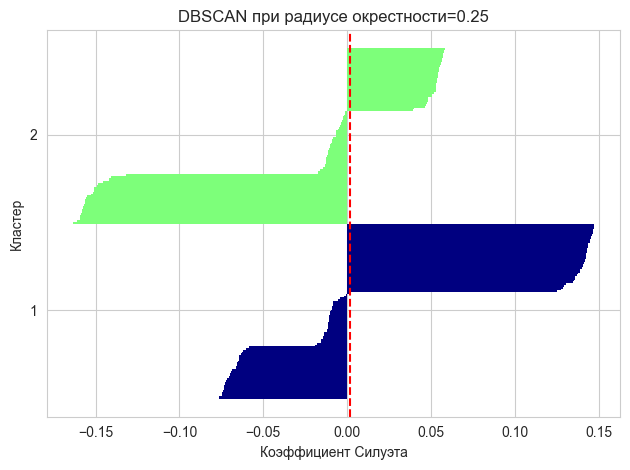

In [10]:
db = DBSCAN(eps=0.25)
preds = db.fit_predict(X1)
print_siluette(db, 'DBSCAN', 0.25, 'радиусе окрестности')

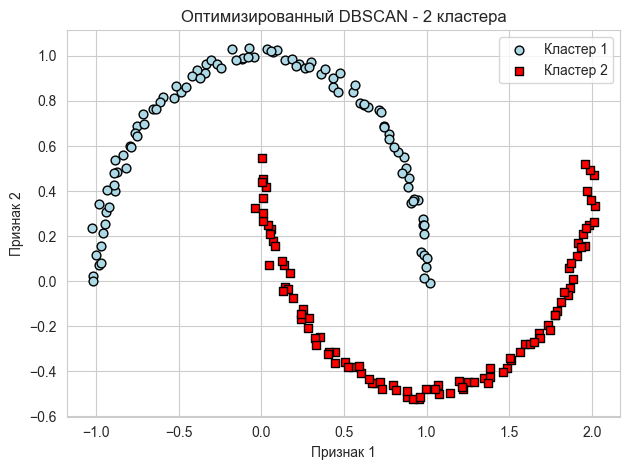

In [11]:
plt.scatter(X1[preds == 0, 0], X1[preds == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='Кластер 1')
plt.scatter(X1[preds == 1, 0], X1[preds == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='Кластер 2')

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Оптимизированный DBSCAN - 2 кластера')
plt.legend()
plt.tight_layout()

## Настройка Mean-Shift с помощью оценки bandwidth

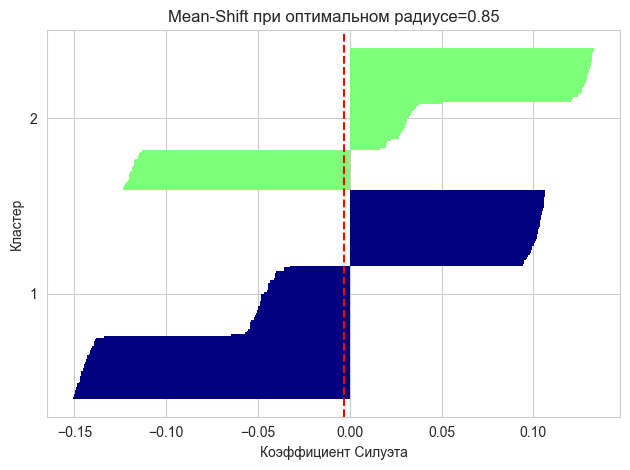

In [29]:
bandwidth = estimate_bandwidth(X1, quantile=0.3, n_samples=500)
ms = MeanShift(bandwidth=bandwidth)
preds = ms.fit_predict(X1)
print_siluette(ms, 'Mean-Shift', round(bandwidth, 2), 'оптимальном радиусе')

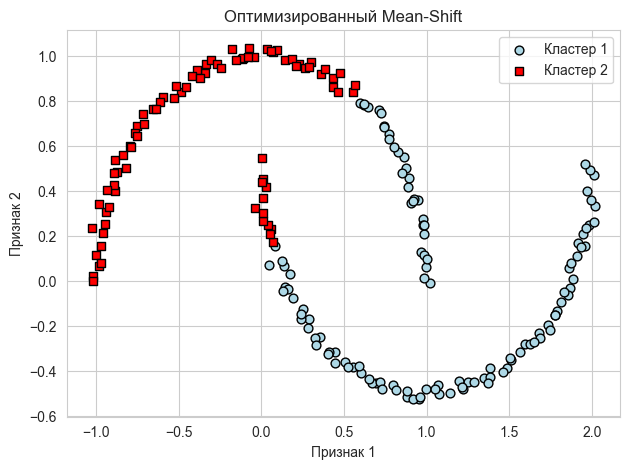

In [30]:
plt.scatter(X1[preds == 0, 0], X1[preds == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='Кластер 1')
plt.scatter(X1[preds == 1, 0], X1[preds == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='Кластер 2')

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Оптимизированный Mean-Shift')
plt.legend()
plt.tight_layout()

# Задание 6 сделано

# Итог

In [31]:
print('ОПТИМАЛЬНЫЕ ПАРАМЕТРЫ ДЛЯ АЛГОРИТМОВ')
columns = pd.MultiIndex.from_tuples([
    ('Количество кластеров', 'капли'),
    ('Количество кластеров', 'полумесяцы'),
    ('Радиус окрестности', 'капли'),
    ('Радиус окрестности', 'полумесяцы'),
])
data = pd.DataFrame(columns=columns,
                    data=[[3, 2, "-", "-"], ['-', '-', 0.5, 0.25], ['-', '-', 1, 0.85]])
data.index = ['Kmeans', 'DBSCAN', 'Mean-Shift']
data

ОПТИМАЛЬНЫЕ ПАРАМЕТРЫ ДЛЯ АЛГОРИТМОВ


Количество кластеров            Радиус окрестности           
                          капли полумесяцы              капли полумесяцы
Kmeans                        3          2                  -          -
DBSCAN                        -          -                0.5       0.25
Mean-Shift                    -          -                  1       0.85